In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [3]:
# Import data
df = pd.read_excel('stock_price_data.xlsx', sheet_name = None, index_col = 0)

## Data Cleaning

In [4]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != "Summary" else "")

0005.HK
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64
0027.HK
Open         164
High         164
Low          164
Close        164
Adj Close    164
Volume       164
dtype: int64
0101.HK
Open         82
High         82
Low          82
Close        82
Adj Close    82
Volume       82
dtype: int64
HSI
Open          79
High          79
Low           79
Close         79
Adj Close     79
Volume       461
dtype: int64
DJI
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
SSEC
Open         129
High         129
Low          129
Close        129
Adj Close    129
Volume       129
dtype: int64
Summary
HSBC (5)               0
Galaxy (027）           0
Hang Lung (101)        0
HSI                    0
DJI (to be updated)    0
SSEC                   0
dtype: int64

In [5]:
for i in df:
    i != "Summary" and df[i].interpolate(method = 'linear', axis = 0, limit = None, inplace = True) 

In [6]:
for i in df:
    print(i, df[i].isna().sum(), sep='\n', end = "\n"+"="*30+"\n" if i != "Summary" else "")

0005.HK
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0027.HK
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0101.HK
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
HSI
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       395
dtype: int64
DJI
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
SSEC
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Summary
HSBC (5)               0
Galaxy (027）           0
Hang Lung (101)        0
HSI                    0
DJI (to be updated)    0
SSEC                   0
dtype: int64

## Split data

In [7]:
train_0005 = df["0005.HK"][:"2022-12-31"]
train_0027 = df["0027.HK"][:"2022-12-31"]
train_0101 = df["0101.HK"][:"2022-12-31"]
test_0005 = df["0005.HK"]["2023-01-01":"2023-2-21"]
test_0027 = df["0027.HK"]["2023-01-01":"2023-2-21"]
test_0101 = df["0101.HK"]["2023-01-01":"2023-2-21"]

## Autoregression, Integration, Moving Average Parameters

In [8]:
p_values = [0, 1]
d_values = range(0, 2)
q_values = range(0, 2)

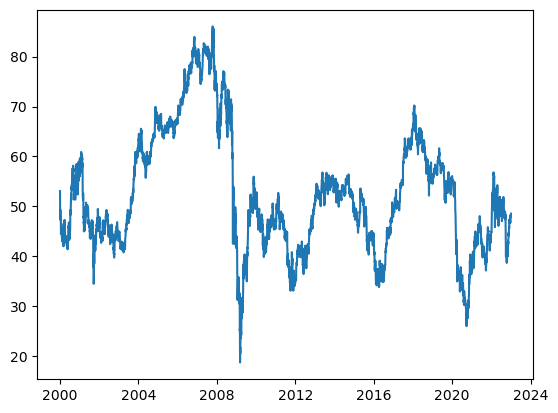

In [9]:
plt.plot(train_0005["Adj Close"])

### Method 1: Auto arima

In [10]:
from pmdarima.arima import auto_arima
arima_model_0005 = auto_arima(train_0005["Adj Close"], test = "adf", trace = True)
arima_model_0027 = auto_arima(train_0027["Adj Close"], test = "adf", trace = True)
arima_model_0101 = auto_arima(train_0101["Adj Close"], test = "adf", trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12844.022, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12845.728, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12845.737, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12842.029, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12846.962, Time=2.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.482 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13518.674, Time=6.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13554.262, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13550.174, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13549.756, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13552.995, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13534.802, Time=2.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : 

In [11]:
arima_model_0005.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5750
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6420.014
Date:                Mon, 06 Mar 2023   AIC                          12842.029
Time:                        00:20:00   BIC                          12848.686
Sample:                             0   HQIC                         12844.346
                               - 5750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5464      0.004    138.065      0.000       0.539       0.554
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             30500.52
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_model_0027.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6751.557
Date:                Mon, 06 Mar 2023   AIC                          13515.114
Time:                        00:20:00   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.502      0.000       1.556       1.598
ar.L2         -0.9525      0.010    -91.630      0.000      -0.973      -0.932
ma.L1         -1.5491      0.013   -118.218      0.000      -1.575      -1.523
ma.L2          0.8904      0.017     53.682      0.000       0.858       0.923
ma.L3          0.0291      0.008      3.859      0.000       0.014       0.044
sigma2         0.6134      0.005    135.517      0.000       0.605       0.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29605.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              69.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_model_0101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -924.775
Date:                Mon, 06 Mar 2023   AIC                           1855.550
Time:                        00:20:00   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.570      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.312      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.905      0.000       0.079       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5005.88
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

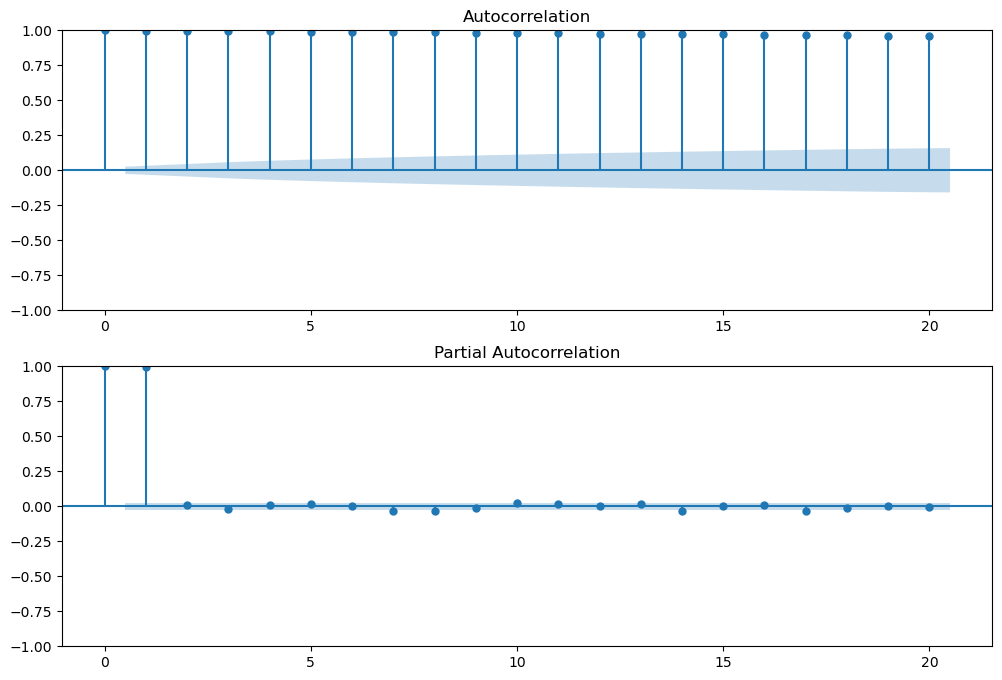

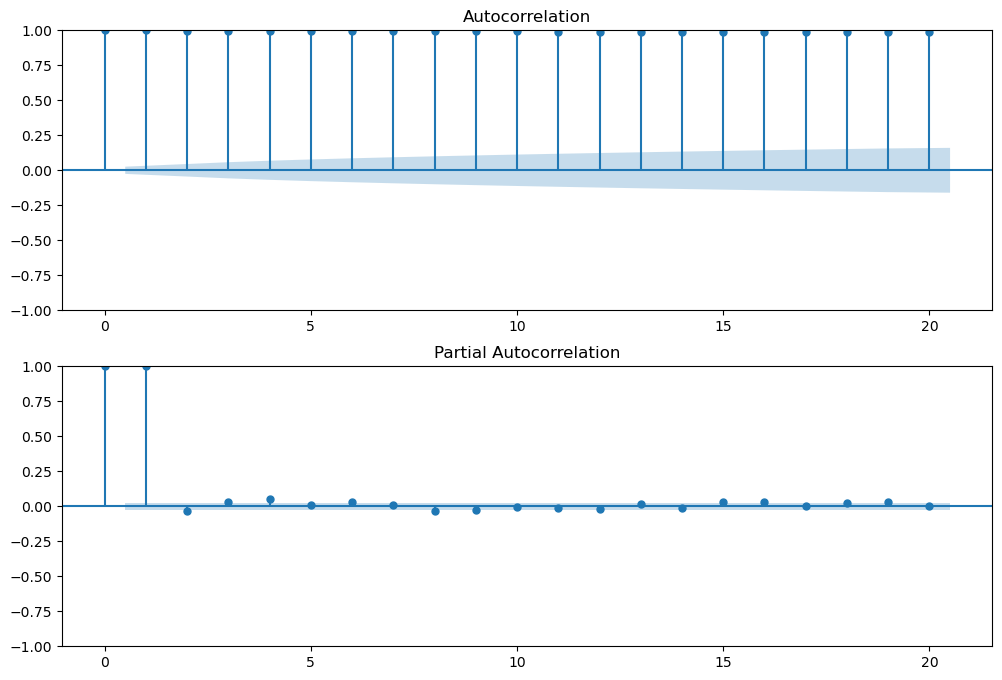

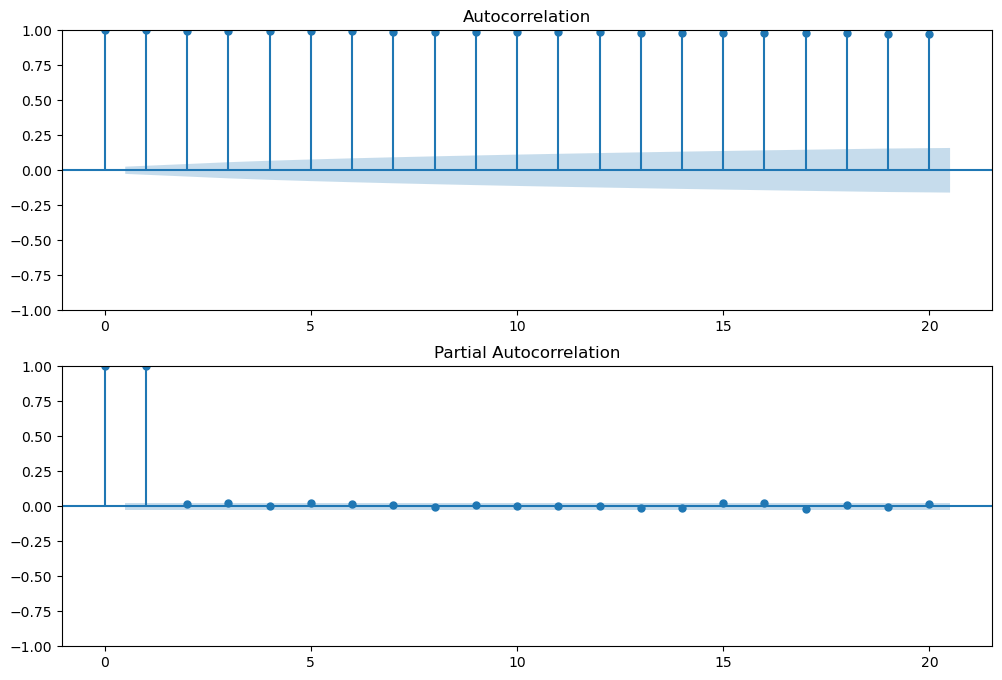

In [14]:
# Function to plot ACF and PACF
def plot_data(data):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
    plot_acf(data, ax=ax1, lags=20)
    plot_pacf(data, ax=ax2, lags=20)
    plt.show()

# Plot ACF and PACF for HSBC stock price
plot_data(train_0005['Adj Close'])

# Plot ACF and PACF for Galaxy Entertainment stock price
plot_data(train_0027['Adj Close'])

# Plot ACF and PACF for Hang Lung Properties stock price
plot_data(train_0101['Adj Close'])

### Method 2: Test p, d, q with larger ranges using trial and error

In [15]:
warnings.filterwarnings('ignore')

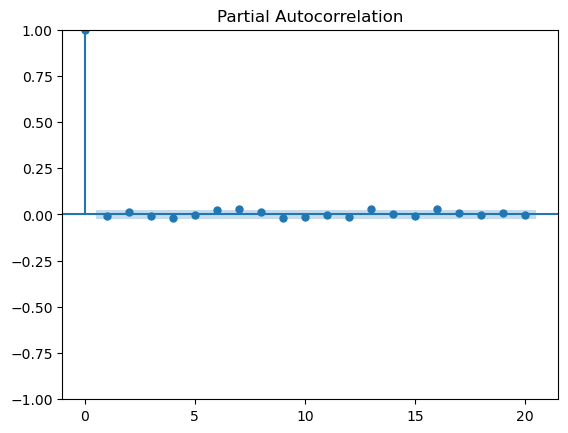

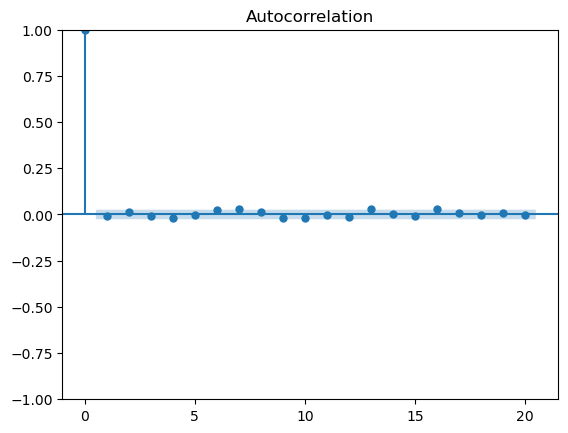

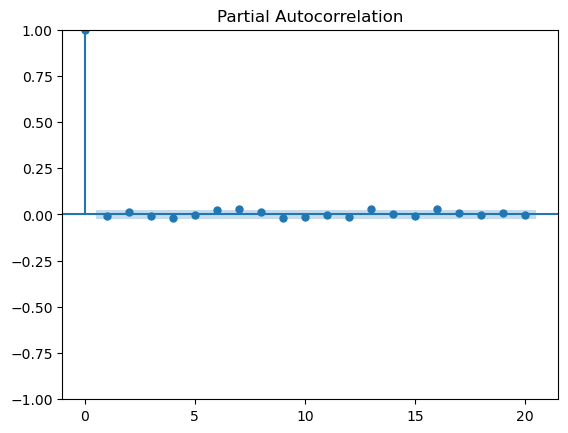

In [16]:
# Determine the value of d using the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_0005["Adj Close"])
d = 0
while result[1] > 0.05:
    d += 1
    result = adfuller(train_0005["Adj Close"].diff(d).dropna())

# ACF and PACF plot
plot_acf(train_0005["Adj Close"].diff(d).dropna(), lags=20)
plot_pacf(train_0005["Adj Close"].diff(d).dropna(), lags=20)

In [17]:
AIC_0005 = {}
for p in range(4):
    for q in range(4):
        model = sm.tsa.arima.ARIMA(train_0005["Adj Close"], order=(p, d, q))
        results = model.fit()
        AIC_0005[(p,d,q)] = results.aic
for i, j in AIC_0005.items():
    print(f"{i}: AIC = {j}")
print("Best model for 0005:", min(AIC_0005.items(), key=lambda x: x[1]))

(0, 1, 0): AIC = 12842.028879077247
(0, 1, 1): AIC = 12843.743806616705
(0, 1, 2): AIC = 12844.28032504742
(0, 1, 3): AIC = 12845.924752268122
(1, 1, 0): AIC = 12843.734860819714
(1, 1, 1): AIC = 12844.968733090833
(1, 1, 2): AIC = 12846.160356115797
(1, 1, 3): AIC = 12848.279378334018
(2, 1, 0): AIC = 12844.311236909562
(2, 1, 1): AIC = 12846.202182992052
(2, 1, 2): AIC = 12840.911081806502
(2, 1, 3): AIC = 12828.053033984961
(3, 1, 0): AIC = 12845.975180297726
(3, 1, 1): AIC = 12847.561933880455
(3, 1, 2): AIC = 12830.076521911635
(3, 1, 3): AIC = 12829.559745584012
Best model for 0005: ((2, 1, 3), 12828.053033984961)


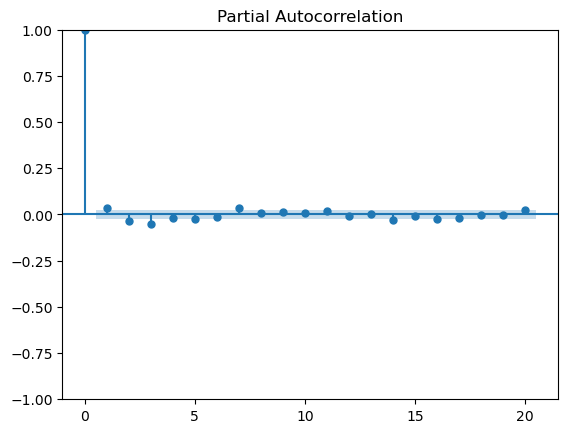

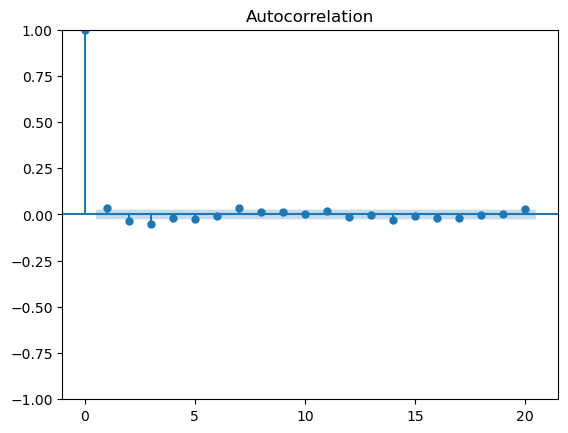

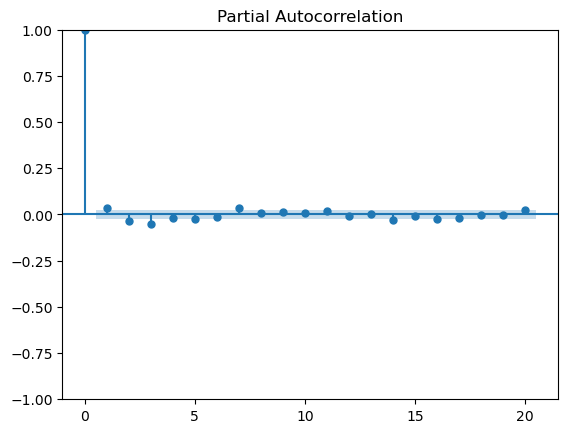

In [18]:
# Determine the value of d using the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_0027["Adj Close"])
d = 0
while result[1] > 0.05:
    d += 1
    result = adfuller(train_0027["Adj Close"].diff(d).dropna())

# ACF and PACF plot
plot_acf(train_0027["Adj Close"].diff(d).dropna(), lags=20)
plot_pacf(train_0027["Adj Close"].diff(d).dropna(), lags=20)

In [19]:
AIC_0027 = {}
for p in range(4):
    for q in range(4):
        model = sm.tsa.arima.ARIMA(train_0027["Adj Close"], order=(p, d, q))
        results = model.fit()
        AIC_0027[(p,d,q)] = results.aic
for i, j in AIC_0027.items():
    print(f"{i}: AIC = {j}")
print("Best model for 0027:", min(AIC_0027.items(), key=lambda x: x[1]))

(0, 1, 0): AIC = 13552.994748469922
(0, 1, 1): AIC = 13548.440870196851
(0, 1, 2): AIC = 13545.110507731144
(0, 1, 3): AIC = 13530.222241780855
(1, 1, 0): AIC = 13548.85978205297
(1, 1, 1): AIC = 13549.102484159266
(1, 1, 2): AIC = 13533.683545930997
(1, 1, 3): AIC = 13529.782097003279
(2, 1, 0): AIC = 13544.089592894594
(2, 1, 1): AIC = 13531.951927850516
(2, 1, 2): AIC = 13517.468105027297
(2, 1, 3): AIC = 13515.1142326683
(3, 1, 0): AIC = 13530.997856017706
(3, 1, 1): AIC = 13529.106348042158
(3, 1, 2): AIC = 13515.308859777317
(3, 1, 3): AIC = 13516.402836537993
Best model for 0027: ((2, 1, 3), 13515.1142326683)


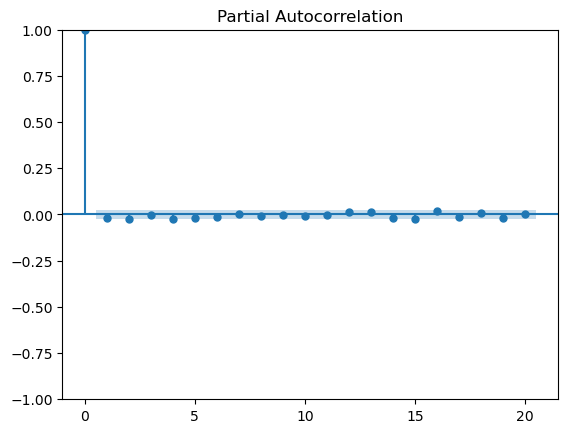

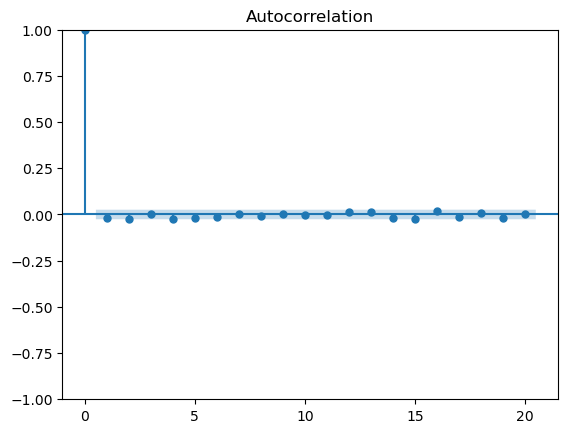

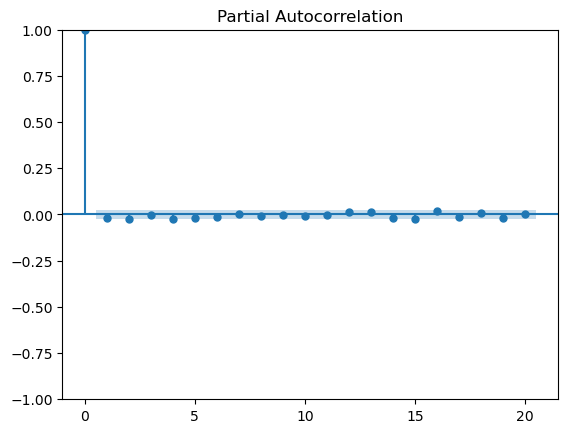

In [20]:
# Determine the value of d using the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_0101["Adj Close"])
d = 0
while result[1] > 0.05:
    d += 1
    result = adfuller(train_0101["Adj Close"].diff(d).dropna())

# ACF and PACF plot
plot_acf(train_0101["Adj Close"].diff(d).dropna(), lags=20)
plot_pacf(train_0101["Adj Close"].diff(d).dropna(), lags=20)

In [21]:
AIC_0101 = {}
for p in range(4):
    for q in range(4):
        model = sm.tsa.arima.ARIMA(train_0101["Adj Close"], order=(p, d, q))
        results = model.fit()
        AIC_0101[(p,d,q)] = results.aic
for i, j in AIC_0101.items():
    print(f"{i}: AIC = {j}")
print("Best model for 0101:", min(AIC_0101.items(), key=lambda x: x[1]))

(0, 1, 0): AIC = 1862.853641527234
(0, 1, 1): AIC = 1862.2040387723223
(0, 1, 2): AIC = 1860.1157606440513
(0, 1, 3): AIC = 1862.1092780741365
(1, 1, 0): AIC = 1862.34306591108
(1, 1, 1): AIC = 1855.5496039316417
(1, 1, 2): AIC = 1857.4003210064993
(1, 1, 3): AIC = 1858.2758549008795
(2, 1, 0): AIC = 1860.3174540144757
(2, 1, 1): AIC = 1862.3173612728742
(2, 1, 2): AIC = 1858.7936279531493
(2, 1, 3): AIC = 1859.2095654697187
(3, 1, 0): AIC = 1862.3174196985706
(3, 1, 1): AIC = 1864.316823148527
(3, 1, 2): AIC = 1859.1726444892538
(3, 1, 3): AIC = 1861.3301560281125
Best model for 0101: ((1, 1, 1), 1855.5496039316417)


In [22]:
print(" "+"-"*46)
print("|{:^13s}|{:^11s}|{:^20s}|".format("Data", "Order", "AIC"))
print("|{:-^13s}|{:-^11s}|{:-^20s}|".format("", "", ""))
print("|{:^13s}|{:^11s}|{:^20.12f}|".format("train_0005", str(min(AIC_0005, key=AIC_0005.get)), AIC_0005.get(min(AIC_0005, key=AIC_0005.get))))
print("|{:^13s}|{:^11s}|{:^20.10f}|".format("train_0027", str(min(AIC_0027, key=AIC_0027.get)), AIC_0027.get(min(AIC_0027, key=AIC_0027.get))))
print("|{:^13s}|{:^11s}|{:^20.13f}|".format("train_0101", str(min(AIC_0101, key=AIC_0101.get)), AIC_0101.get(min(AIC_0101, key=AIC_0101.get))))
print(" "+"-"*46)

 ----------------------------------------------
|    Data     |   Order   |        AIC         |
|-------------|-----------|--------------------|
| train_0005  | (2, 1, 3) | 12828.053033984961 |
| train_0027  | (2, 1, 3) |  13515.1142326683  |
| train_0101  | (1, 1, 1) | 1855.5496039316417 |
 ----------------------------------------------


In [23]:
min(AIC_0027, key=AIC_0027.get)

(2, 1, 3)

In [24]:
model = sm.tsa.arima.ARIMA(train_0005["Adj Close"], order=min(AIC_0005, key=AIC_0005.get))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5750
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6408.027
Date:                Mon, 06 Mar 2023   AIC                          12828.053
Time:                        00:21:21   BIC                          12867.994
Sample:                             0   HQIC                         12841.953
                               - 5750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1217      0.005    229.814      0.000       1.112       1.131
ar.L2         -0.9903      0.005   -205.703      0.000      -1.000      -0.981
ma.L1         -1.1319      0.008   -148.813      0.000      -1.147      -1.117
ma.L2          1.0038      0.009    115.742      0.000       0.987       1.021
ma.L3         -0.0177      0.006     -2.844      0.004      -0.030      -0.006
sigma2         0.5438      0.004    129.645      0.000       0.536       0.552
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             29003.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.37
Prob(H) (two-sided):                  0.02   Kurtosis:                        13.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
model = sm.tsa.arima.ARIMA(train_0027["Adj Close"], order=(min(AIC_0027, key=AIC_0027.get)))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5749
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6751.557
Date:                Mon, 06 Mar 2023   AIC                          13515.114
Time:                        00:21:25   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.502      0.000       1.556       1.598
ar.L2         -0.9525      0.010    -91.630      0.000      -0.973      -0.932
ma.L1         -1.5491      0.013   -118.218      0.000      -1.575      -1.523
ma.L2          0.8904      0.017     53.682      0.000       0.858       0.923
ma.L3          0.0291      0.008      3.859      0.000       0.014       0.044
sigma2         0.6134      0.005    135.517      0.000       0.605       0.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29605.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              69.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model = sm.tsa.arima.ARIMA(train_0101["Adj Close"], order=min(AIC_0101, key=AIC_0101.get))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5749
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -924.775
Date:                Mon, 06 Mar 2023   AIC                           1855.550
Time:                        00:21:26   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.570      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.312      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.905      0.000       0.079       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5005.88
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""